In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression 
import xgboost as xgb
from tabulate import tabulate 
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("startup_data.csv")

In [4]:
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [6]:
df.dtypes

Startup Name               object
Industry                   object
Funding Rounds              int64
Funding Amount (M USD)    float64
Valuation (M USD)         float64
Revenue (M USD)           float64
Employees                   int64
Market Share (%)          float64
Profitable                  int64
Year Founded                int64
Region                     object
Exit Status                object
dtype: object

In [7]:
df.shape

(500, 12)

In [8]:
df.isna().sum()

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


In [10]:
df.describe(include="all")

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
count,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,500,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,Startup_500,EdTech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Private
freq,1,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,348
mean,NaN,NaN,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000,NaN,NaN
std,NaN,NaN,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128,NaN,NaN
min,NaN,NaN,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000,NaN,NaN
25%,NaN,NaN,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000,NaN,NaN
50%,NaN,NaN,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000,NaN,NaN
75%,NaN,NaN,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000,NaN,NaN


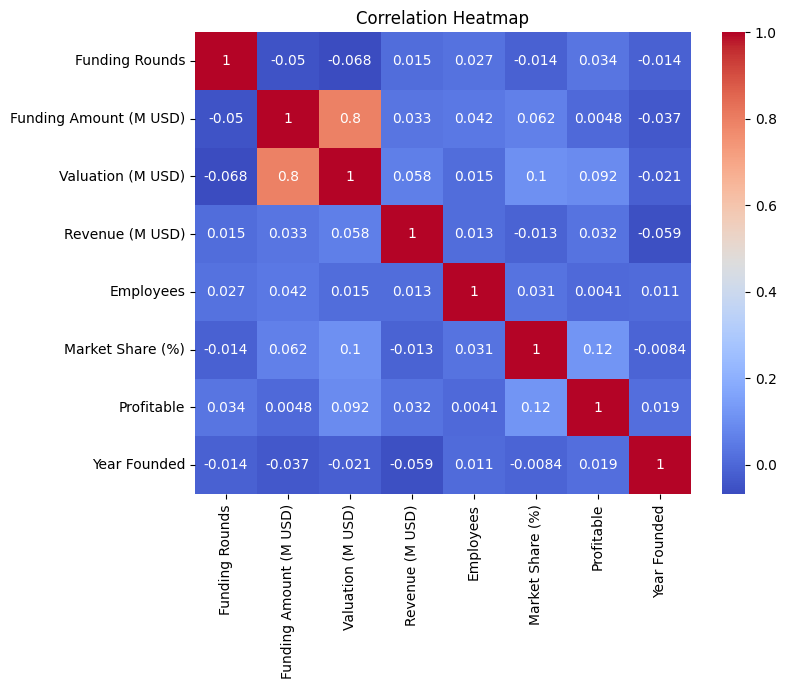

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

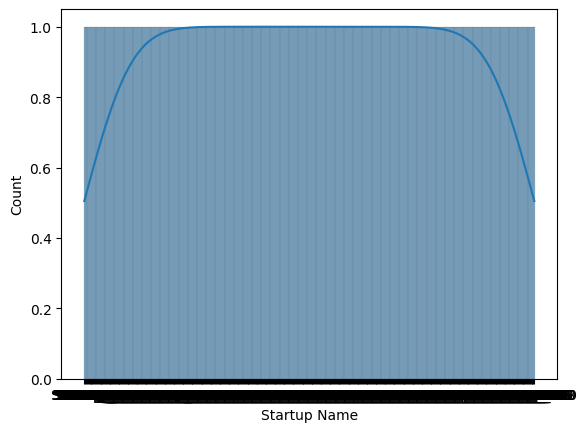

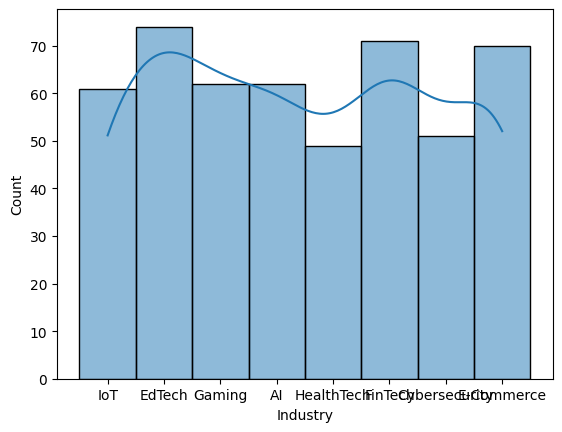

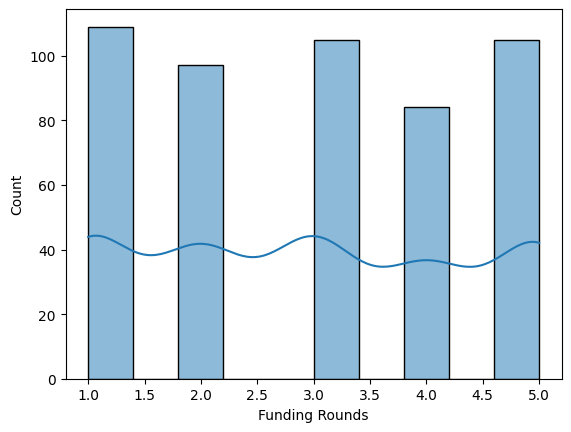

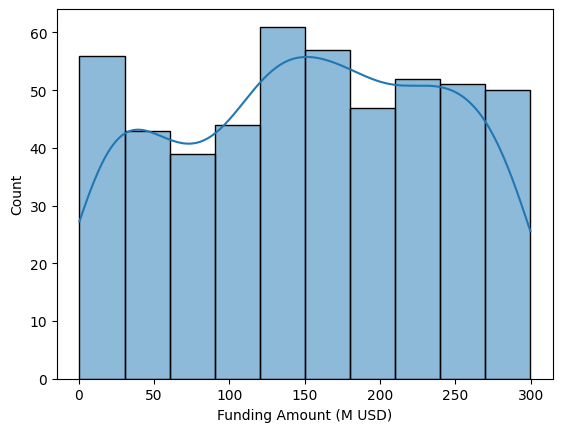

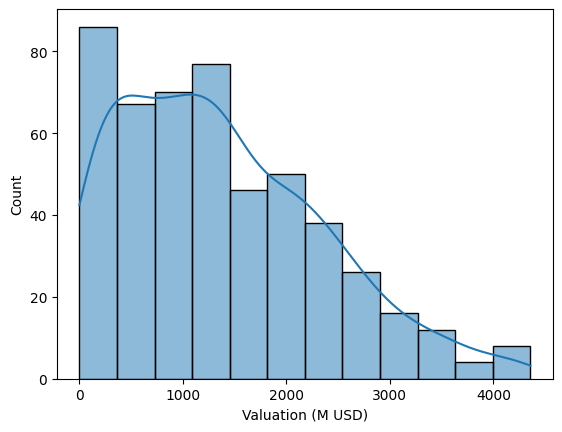

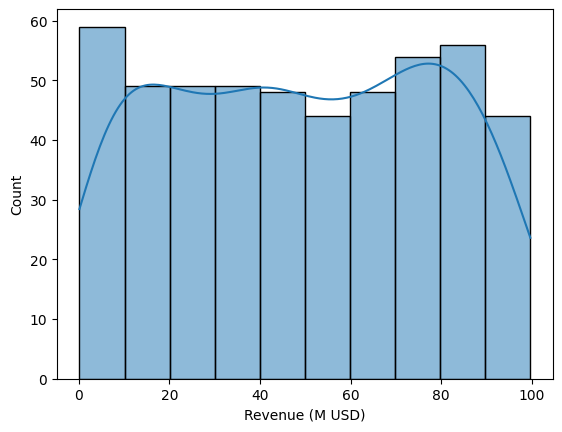

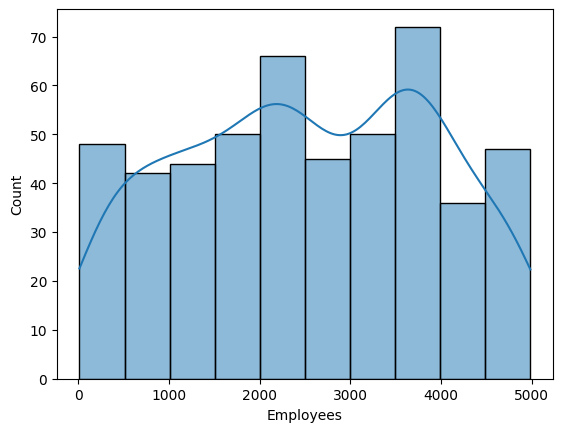

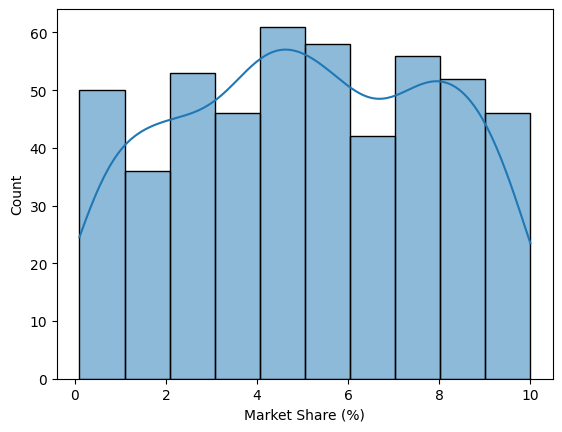

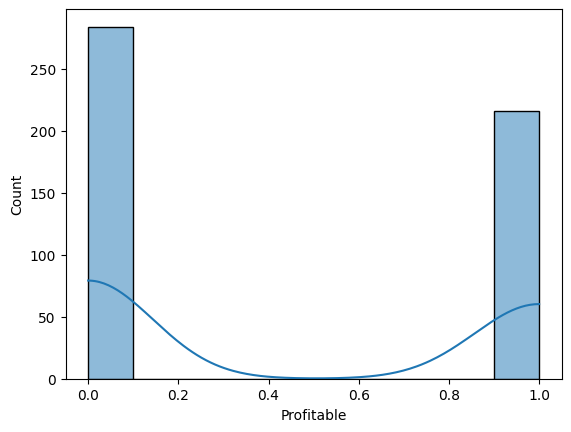

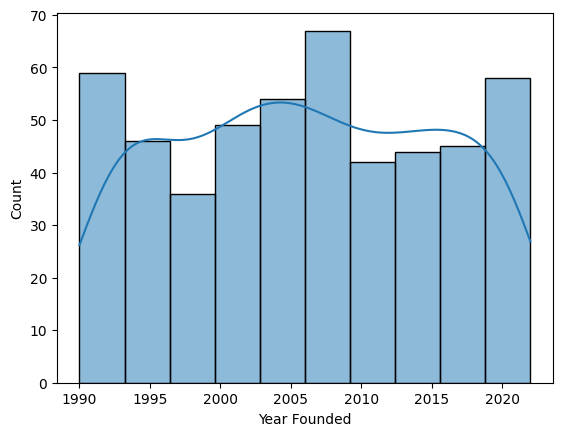

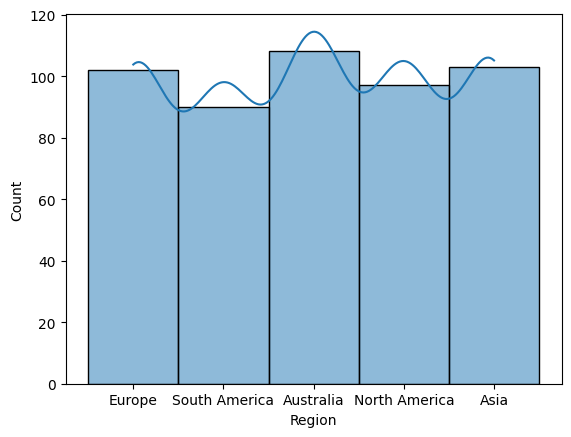

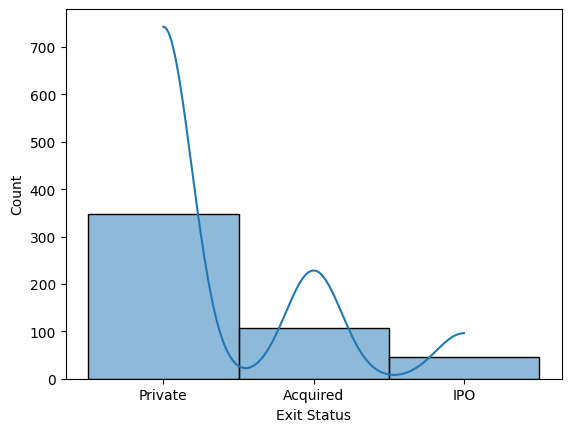

In [14]:
for col in df:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

In [15]:
# Data Cleaning and Preprocessing

# Convert 'Year Founded' to numeric type if not already
df['Year Founded'] = pd.to_numeric(df['Year Founded'], errors='coerce')

# Create a binary column for Exit Status
# We assume that if the exit status is either 'Acquired' or 'IPO', then the startup exited (1), else 0
df['Exited'] = df['Exit Status'].apply(lambda x: 1 if x in ['Acquired', 'IPO'] else 0)

# Check unique values before encoding any categorical variables
print('Unique Exit Status values:', df['Exit Status'].unique())
print('Unique binary Exited values:', df['Exited'].unique())

# If needed, further preprocessing and encoding for other categorical features can be applied here

# For exploratory analysis, we can also convert Industry and Region to category datatype
df['Industry'] = df['Industry'].astype('category')
df['Region'] = df['Region'].astype('category')

Unique Exit Status values: ['Private' 'Acquired' 'IPO']
Unique binary Exited values: [0 1]


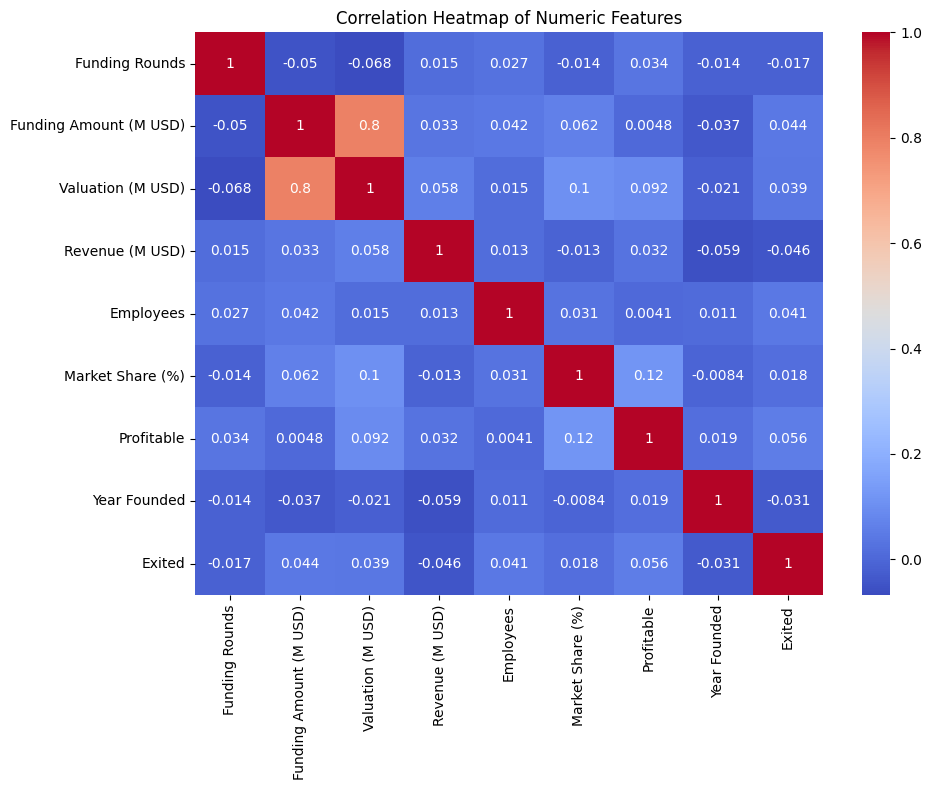

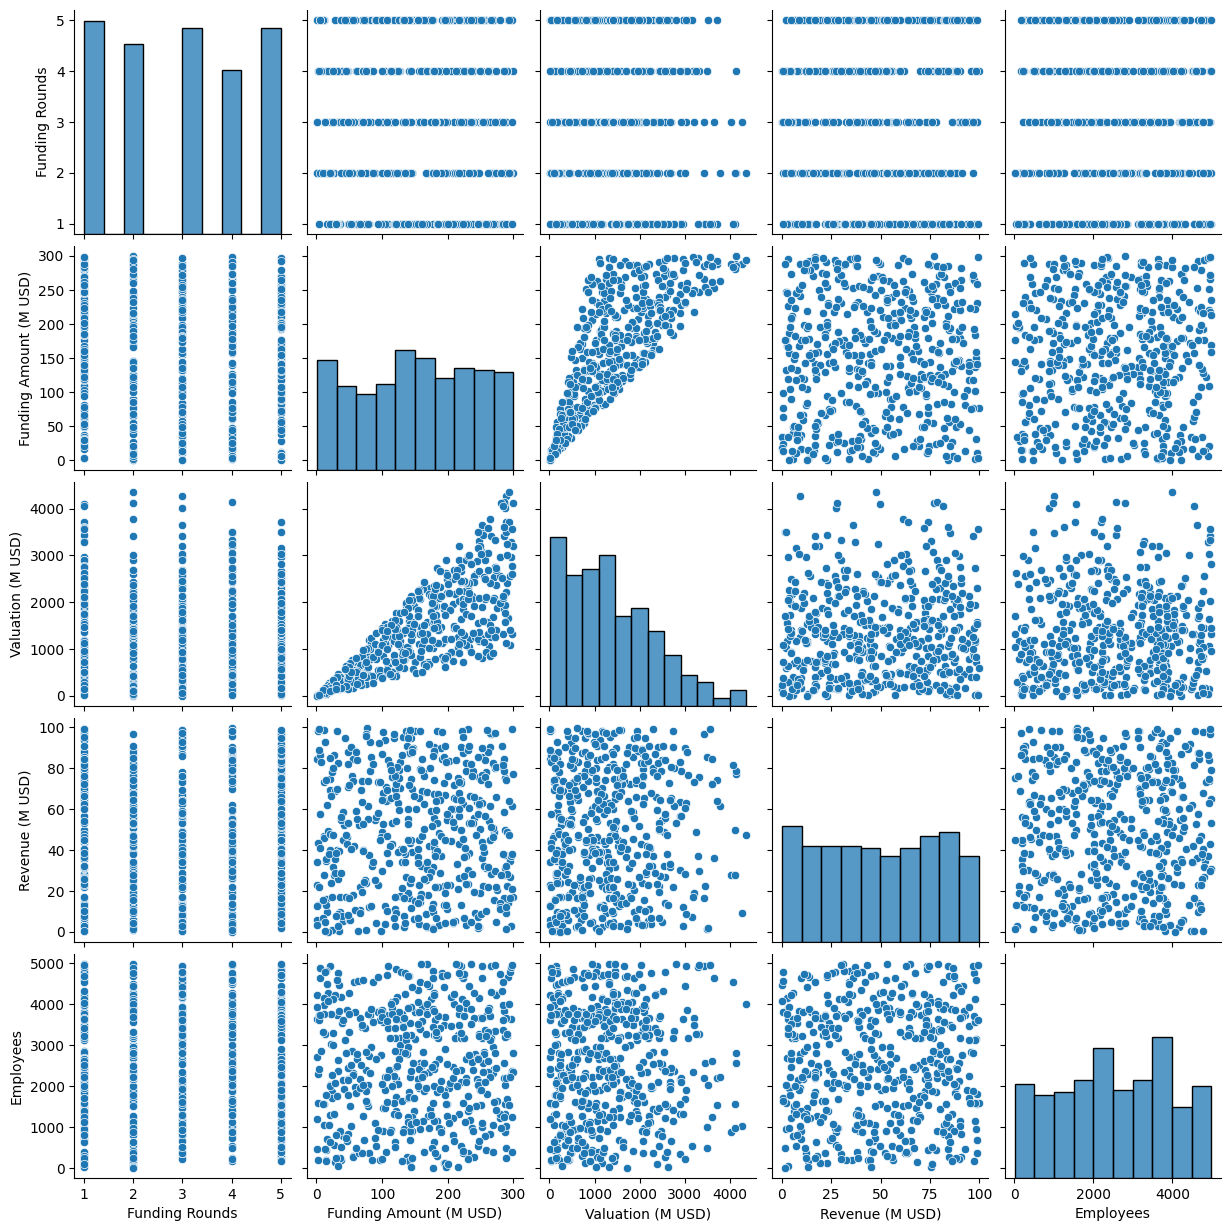

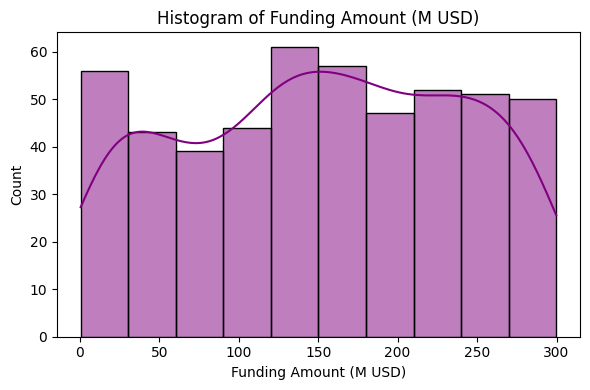

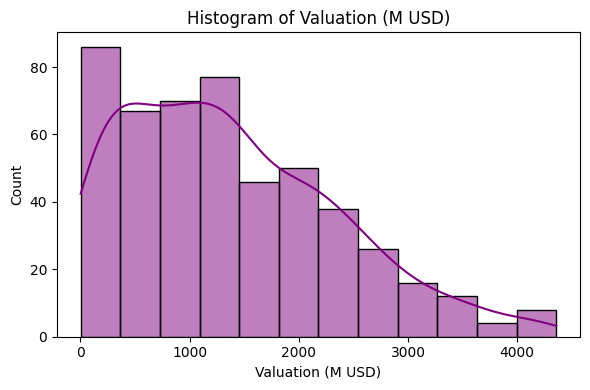

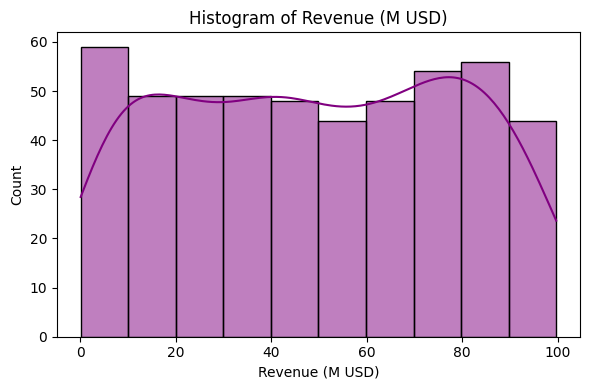

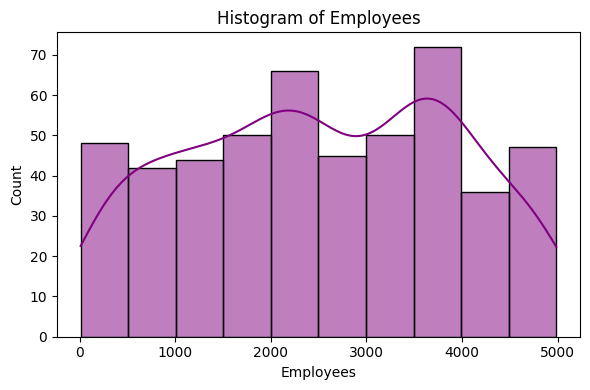

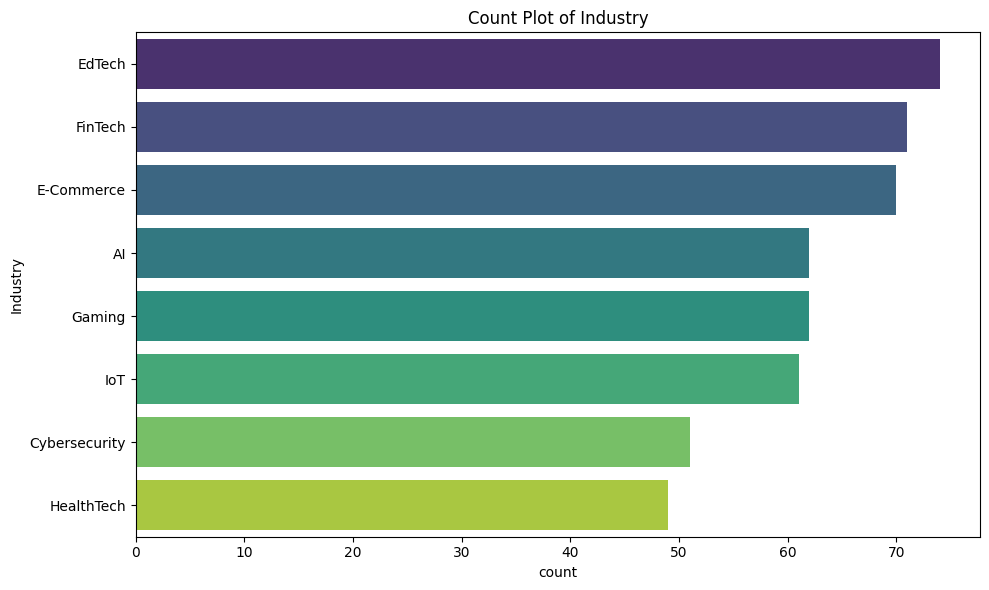

In [16]:
# Exploratory Data Analysis

# Numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# If there are at least 4 numeric columns, create a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Pair Plot among numeric variables (limit to a subset if too many variables)
sns.pairplot(numeric_df.iloc[:, :min(5, numeric_df.shape[1])])
plt.show()

# Histograms for selected numeric features
selected_features = ['Funding Amount (M USD)', 'Valuation (M USD)', 'Revenue (M USD)', 'Employees']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature].dropna(), kde=True, color='purple')
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()
    plt.show()

# Count Plot for categorical variable: Industry
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index, palette='viridis')
plt.title('Count Plot of Industry')
plt.tight_layout()
plt.show()